## SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task we are going to examine kernels for SVM algorithm applied to rather simple artificial datasets.

We will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

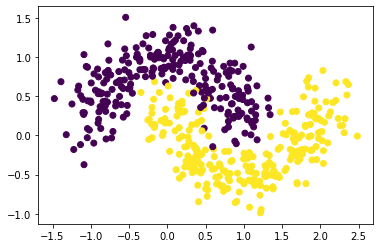

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [3]:
moons_points.shape

(500, 2)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

We will  train LR and SVM classifiers (choosing params by hand, no CV or intensive grid search for now) and plot their decision regions, calculate f1 metric.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

logreg = LogisticRegression(C=1.0)
svm = SVC(kernel='linear', C=1.0)

from sklearn.metrics import f1_score

In [6]:
# source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

def plot_decision(pred_func, X, Y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .002  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [7]:
X, Y = moons_points, moons_labels
logreg.fit(X, Y)
y_pred_logreg = logreg.predict(X)
f1_score(Y, y_pred_logreg)

0.855421686746988

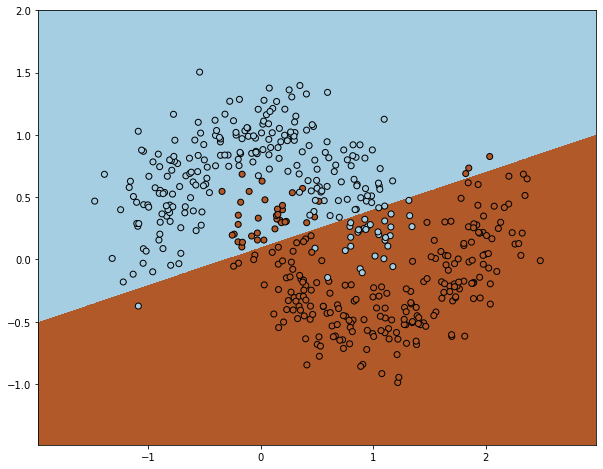

In [8]:
plot_decision(logreg.predict, X, Y)

In [9]:
svm.fit(X,Y)
y_pred_svm = svm.predict(X)
f1_score(Y, y_pred_svm)

0.8565656565656565

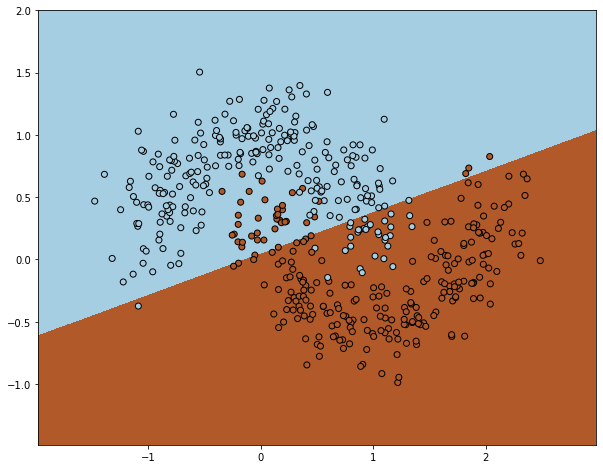

In [10]:
plot_decision(svm.predict, X, Y)

**Summary:**

*   Logistic Regression f1_score: 0.855 
*   SVM f1_score: 0.857

We could see that our data points are not linearly separable. Given that fact, our linear models did a pretty good job.



## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric we've chosen eariler.

In [11]:
svm = SVC(kernel='poly', C=1.0, degree=3) # degree=3 is the best value that was found using cross-validation for all possible values from 2 to 10
svm.fit(X,Y)
y_pred_svm = svm.predict(X)
print(f1_score(Y, y_pred_svm))

0.9104761904761904


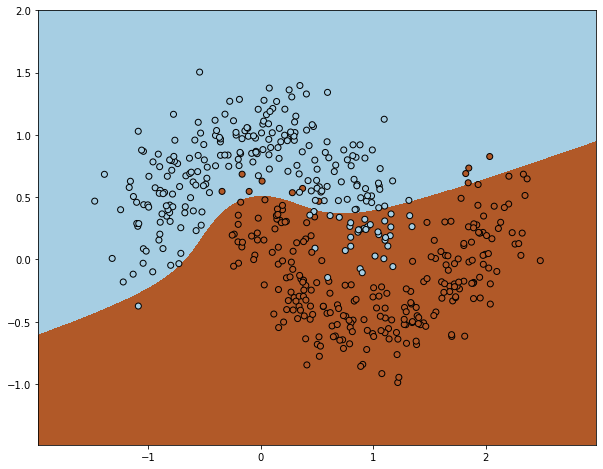

In [12]:
plot_decision(svm.predict, X, Y)

In [13]:
svm = SVC(kernel='rbf', C=1.0, gamma=1)
svm.fit(X,Y)
y_pred_svm = svm.predict(X)
print(f1_score(Y, y_pred_svm))

0.9759036144578314


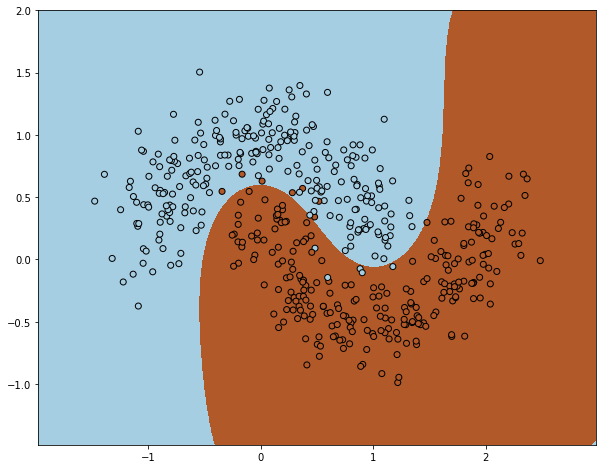

In [14]:
plot_decision(svm.predict, X, Y)

In [15]:
svm = SVC(kernel='sigmoid', C=0.02)
svm.fit(X,Y)
y_pred_svm = svm.predict(X)
print(f1_score(Y, y_pred_svm))

0.797074954296161


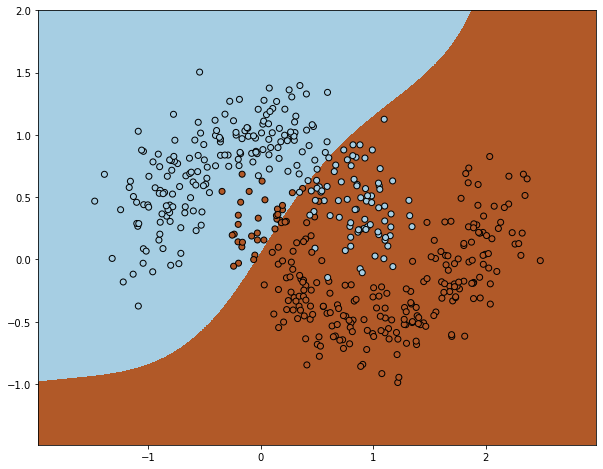

In [16]:
plot_decision(svm.predict, X, Y)

**Summary:**

Classification quality significantly improved when using 'rbf' (0.978) and 'poly' (0.91) kernels, but decreased when using 'sigmoid'(0.797).

Now the decision boundaries are clearly non-linear.

## 1.3 Simpler solution (of a kind)
So, could we use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Now let's generate the set of new features, train LR on it, plot decision regions, calculate metric.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X)
logreg = LogisticRegression(C=1.0, max_iter=500)
logreg.fit(X_poly, Y)
y_pred_logreg = logreg.predict(X_poly)
f1_score(Y, y_pred_logreg)

0.9718875502008033

In [18]:
def pred_poly(X):
    return logreg.predict(poly.fit_transform(X))

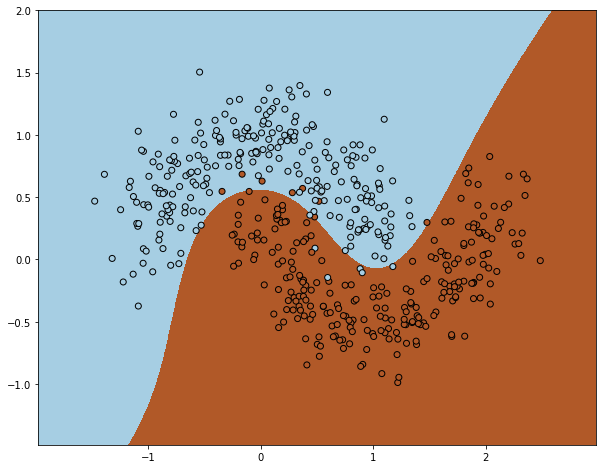

In [19]:
plot_decision(pred_poly, X, Y)

**Summary:**

Classification quality (0.971) and decision boundary is similar to the SVM model predictions with 'rbf' kernel. Poly Features with degree=5 seems to give pretty good results. Poly degree for the SVM model was 3.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

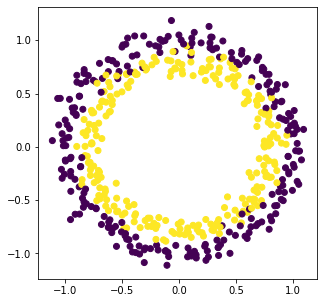

In [20]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

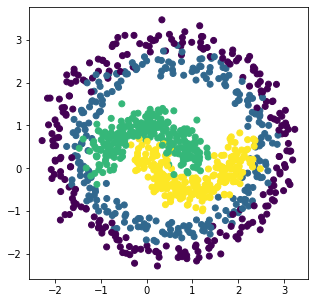

In [21]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now let's try to do our best using all the approaches above!

In [22]:
X, Y = points, labels
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)
logreg = LogisticRegression(C=1.0, max_iter=5000)
logreg.fit(X_poly, Y)
y_pred_logreg = logreg.predict(X_poly)
f1_score(Y, y_pred_logreg, average='weighted')

0.941054306221137

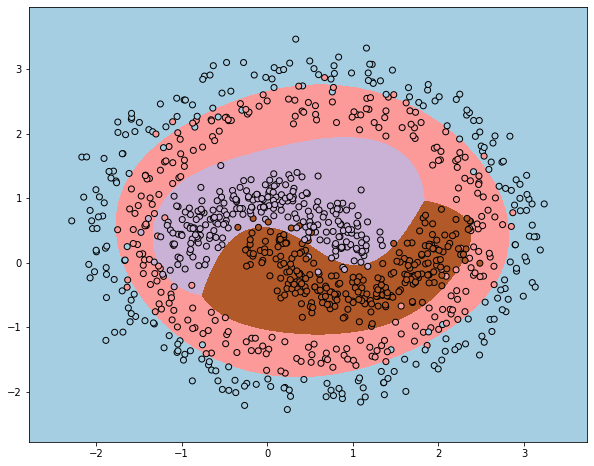

In [23]:
plot_decision(pred_poly, X, Y)

In [24]:
svm = SVC(kernel='rbf', C=0.2, gamma=1)
svm.fit(X,Y)
y_pred_svm = svm.predict(X)
f1_score(Y, y_pred_svm, average='weighted')

0.9300614416589498

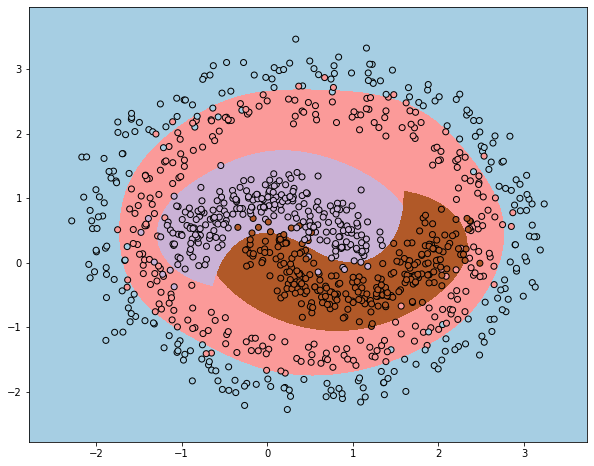

In [25]:
plot_decision(svm.predict, X, Y)

**Summary**

For the data given above, SVM model with 'rbf' kernel and LR using PolyFeatures(degree=4) gave us the best results: 0.93 and 0.941 f1_scores respectively.